In [1]:
from climQMBC.methods import QM, DQM, QDM, UQM, SDM
from climQMBC.report import report
import pandas as pd
import numpy as np

In [3]:
# =============================================================================
# I) Monthly and annual data
# =============================================================================
# variable:
#    - pr  (precipitation)
#    - tas (temperature)
# allow_negatives:
#    - 0 (variables like precipitation)
#    - 1 (variables like temperature)
# mult_change:
#    - 0 (additive change: fut = hist + delta) 
#    - 1 (multiplicative change: fut = hist*delta)
# SDM_var: (for Scaled Distribution Mapping only)
#    - 0 (temperature: normal distribution and additive changes) 
#    - 1 (precipitation: gamma distribution and multiplicative changes)
# frq:
#    - 'D': Daily data (use in section II. Section I works for 'M' and 'A')
#    - 'M': Monthly data (report function works only with 'M')
#    - 'A': Anual data

variable = 'pr'
mult_change = 1
allow_negatives = 0
SDM_var = 1

# Load observed and model data.
obs = pd.read_csv(f'Sample_data/obs_{variable}_M.csv')[[variable]].values
mod = pd.read_csv(f'Sample_data/mod_{variable}_M.csv')[[variable]].values

Description of this report:

Description of the table
The first line shows the difference (relative or absolute, accordingto the variable analyzed) between the QM method and the observed datain the historical period. For precipitation, a value of 1 means thatthe mean precipitation of the observed data and QM series are the samefor the historical period. For temperature, this is achieved with avalue of 0. The second line shows the headers of the periods reported.Remember that the moving window is centered in the period and itslength is equal to the length of the historical period. The first column (Hist.) shows the difference between the future and thehistorical period. The next columns show the difference between thecorresponding period and the historical period. The third and thefollowing lines show the difference in each period for thecorresponding series. As a general rule, it is desirable that thedifference between the future periods and the historical period of thebias corrected s

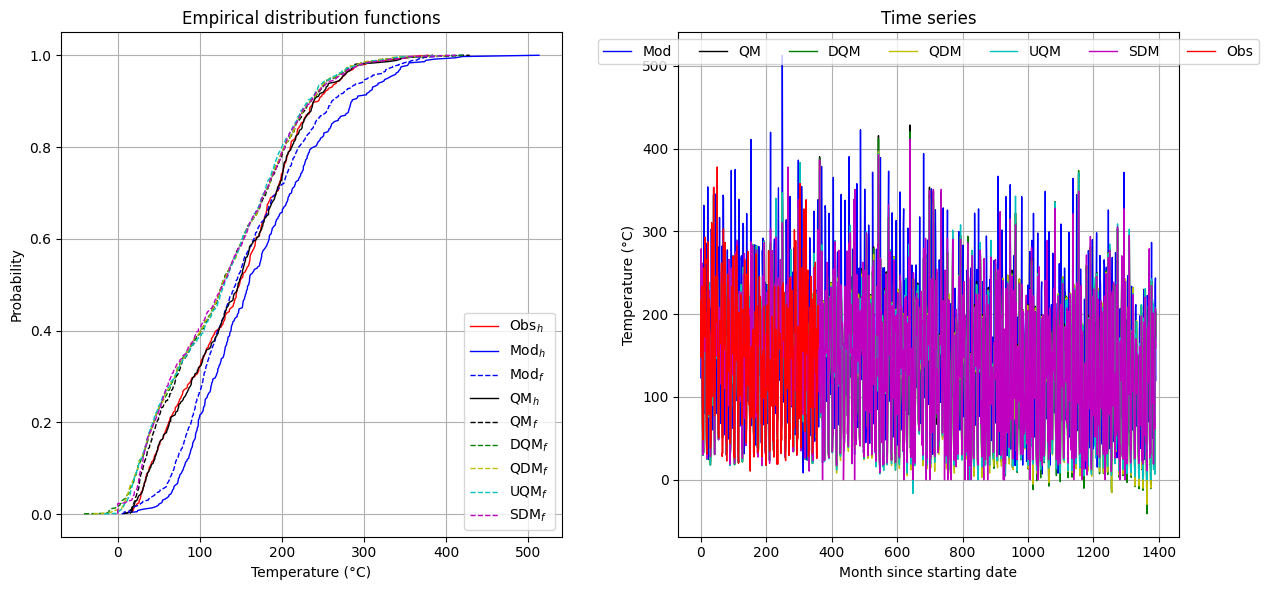

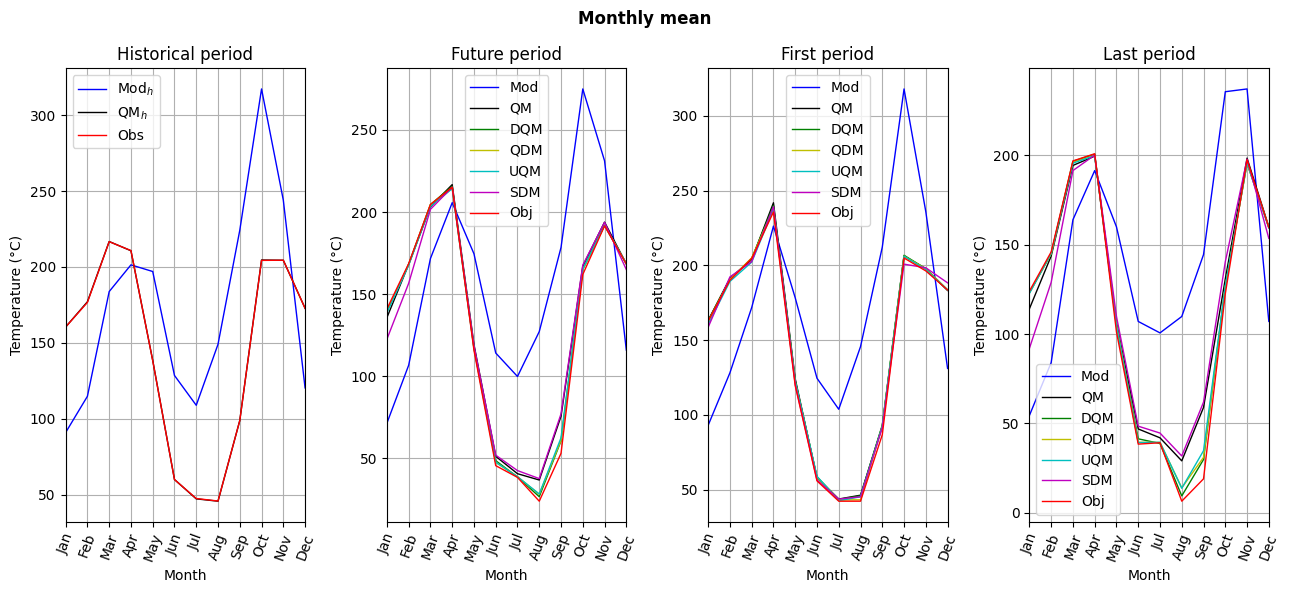

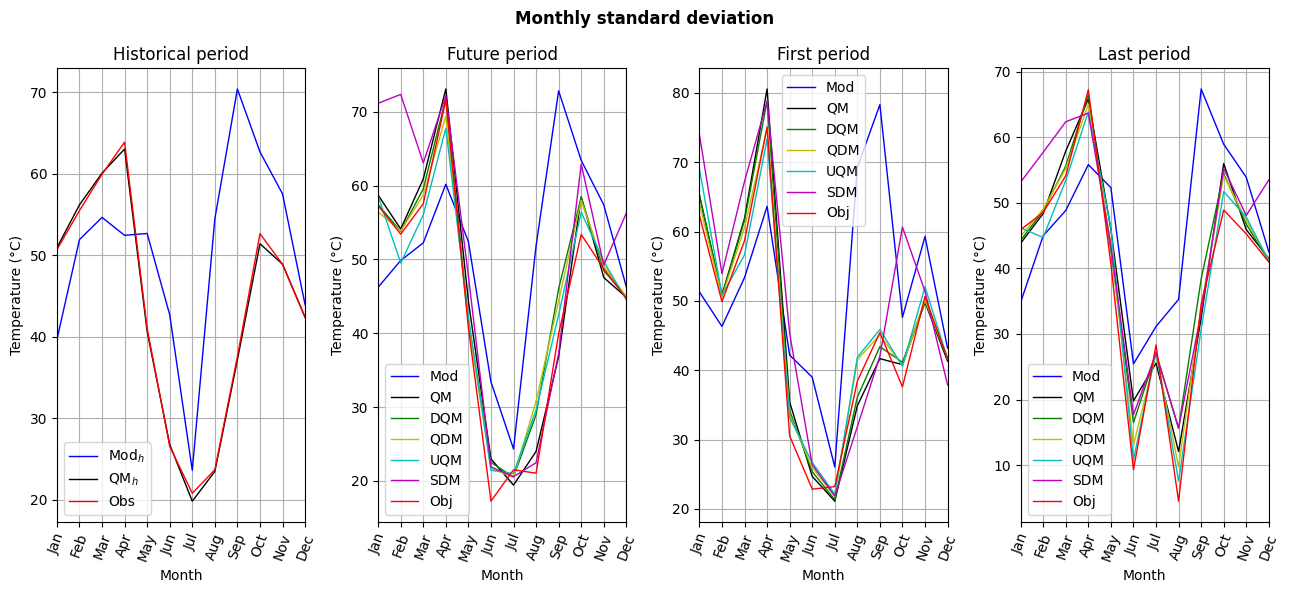

In [5]:
# Example 1
# Example 1 shows how to use the report function with the minimum number
# of inputs. The five methods available in the climQMBC package will be
# reported, and the future projected windows displayed are the first
# period after the historical period and the last period before the end
# of the modeled period. Remember that the projected periods length is
# equal to the length of the historical period.

li_series = report(obs, mod, SDM_var=SDM_var, mult_change=mult_change, allow_negatives=allow_negatives)
qm_series,dqm_series,qdm_series,uqm_series,sdm_series = li_series

Description of this report:

Description of the table
The first line shows the difference (relative or absolute, accordingto the variable analyzed) between the QM method and the observed datain the historical period. For precipitation, a value of 1 means thatthe mean precipitation of the observed data and QM series are the samefor the historical period. For temperature, this is achieved with avalue of 0. The second line shows the headers of the periods reported.Remember that the moving window is centered in the period and itslength is equal to the length of the historical period. The first column (Hist.) shows the difference between the future and thehistorical period. The next columns show the difference between thecorresponding period and the historical period. The third and thefollowing lines show the difference in each period for thecorresponding series. As a general rule, it is desirable that thedifference between the future periods and the historical period of thebias corrected s

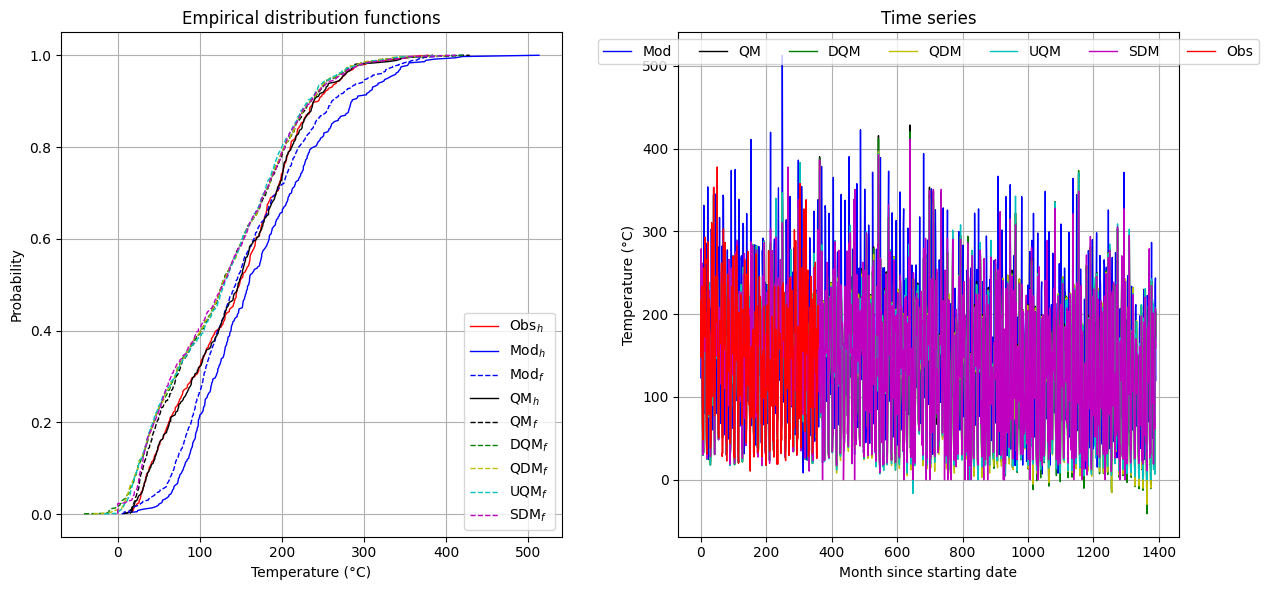

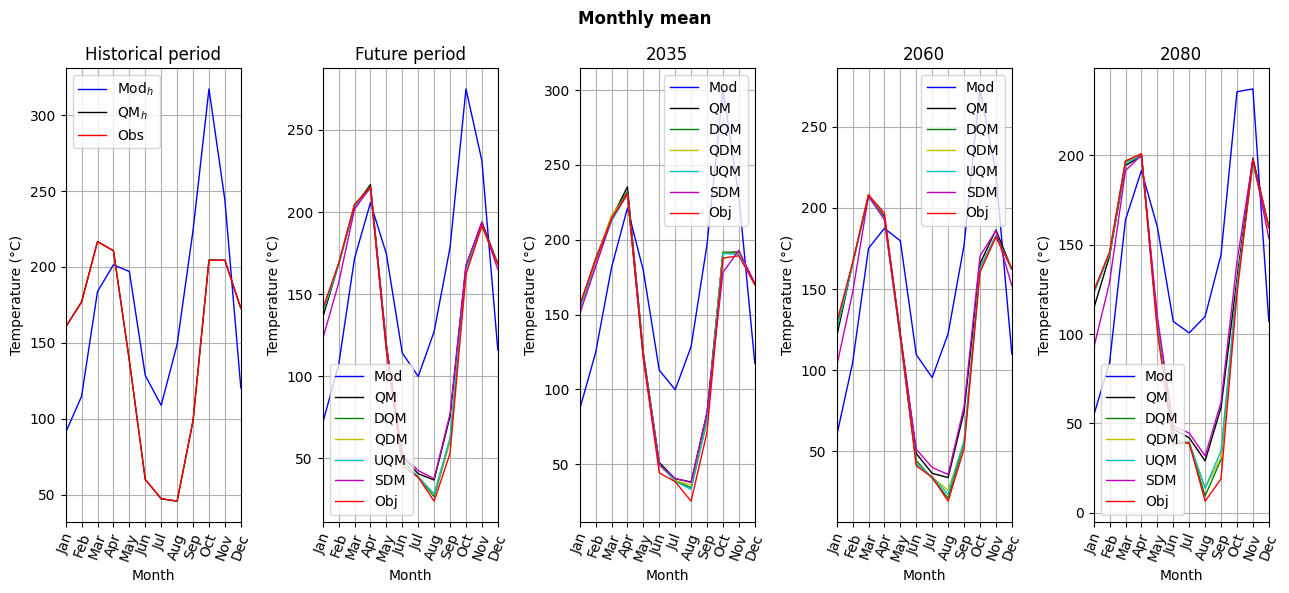

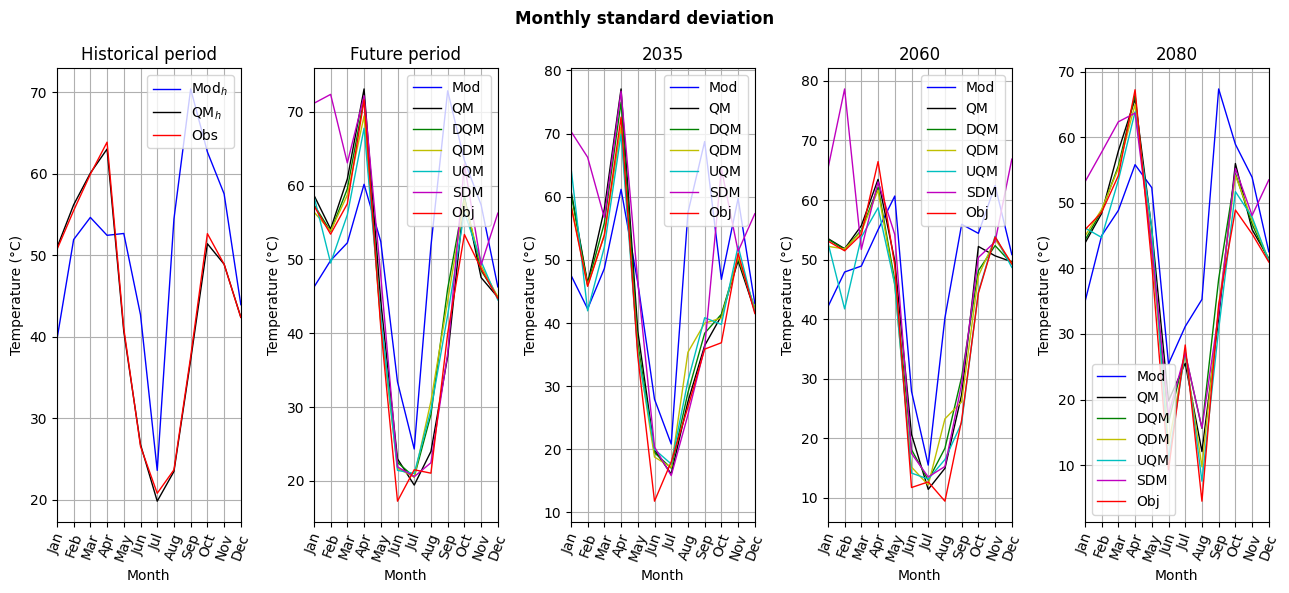

In [6]:
# Example 2
# Example 2 shows how to use the report function for specific bias
# correction methods and projected periods. The Quantile Delta Mapping
# (QDM), Unbiased Quantile Mapping (UQM), and Scaled Distribution Mapping
# (SDM) methods will be reported. The report will analyze the projected periods
# centered in 2035 2060 and 2080.

li_series = report(obs, mod, SDM_var=SDM_var, mult_change=mult_change, allow_negatives=allow_negatives, y_init = 1979,y_wind = [2035,2060,2080])
qm_series,dqm_series,qdm_series,uqm_series,sdm_series=li_series

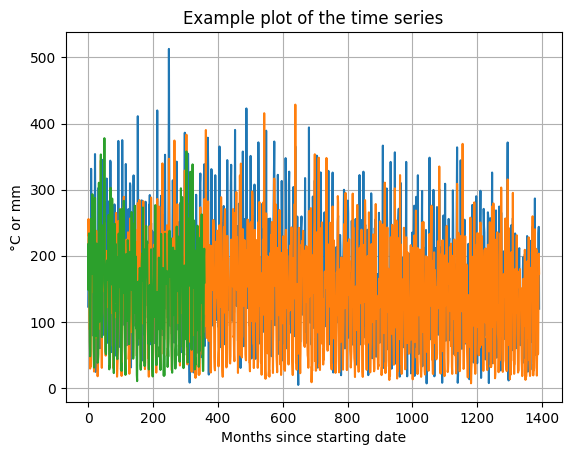

In [8]:
import matplotlib.pylab as plt
# Example 3
# Example 3 shows how each bias correction method available in the
# climQMBC package should be called. The outputs of each function are
# columns vector with monthly corrected data.

frq = 'M' # 'M' for monthly data; 'A' for annually data
qm_series = QM(obs, mod, allow_negatives=allow_negatives, frq=frq)
dqm_series = DQM(obs, mod, mult_change=mult_change, allow_negatives=allow_negatives, frq=frq)
qdm_series = QDM(obs, mod, mult_change=mult_change, allow_negatives=allow_negatives, frq=frq)
uqm_series = UQM(obs, mod, mult_change=mult_change, allow_negatives=allow_negatives, frq=frq)
sdm_series = SDM(obs, mod, SDM_var=SDM_var, frq=frq)

plt.figure()
plt.title('Example plot of the time series')
plt.grid()
plt.plot(mod)
plt.plot(qm_series)
plt.plot(obs)
plt.xlabel('Months since starting date')
plt.ylabel('°C or mm')
plt.show()

In [10]:
# =============================================================================
# II) Daily data
# =============================================================================
# variable:
#    - pr  (precipitation)
#    - tas (temperature)
# allow_negatives:
#    - 0 (variables like precipitation)
#    - 1 (variables like temperature)
# mult_change:
#    - 0 (additive change: fut = hist + delta) 
#    - 1 (multiplicative change: fut = hist*delta)
# frq:
#    - 'D': Daily data
#    - 'M': Monthly data
#    - 'A': Anual data
# SDM_var: (for Scaled Distribution Mapping only)
#    - 0 (temperature: normal distribution and additive changes) 
#    - 1 (precipitation: gamma distribution and multiplicative changes)
# day_win: An integer to define a moving window for each day of the year and 
#          compute the statistics for each probability distribution function
#          and projected change. The lenght of the window is computed as 2*win-1
# pp_threshold: A float to define the threshold to consider rain or no-rain values
# pp_factor: A float to scale pp_threshold and set as limit of the random low
#            values to replace no-rain values
frq = 'D'

variable = 'pr'
mult_change = 1
allow_negatives = 0
SDM_var = 0

day_win = 15
pp_threshold=1
pp_factor=1/10000


# Load observed and model data.
obs = pd.read_csv(f'Sample_data/obs_{variable}_D.csv')[[variable]].values
mod = pd.read_csv(f'Sample_data/mod_{variable}_D.csv')[[variable]].values

In [11]:
# Example 4
# Example 4 shows how each bias correction method available in the
# climQMBC package should be called. The outputs of each function are
# columns vector with daily corrected data.

qm_series = QM(obs, mod, allow_negatives=allow_negatives, frq=frq, day_win=day_win, pp_threshold=pp_threshold, pp_factor=pp_factor)
dqm_series = DQM(obs, mod, allow_negatives=allow_negatives, frq=frq, mult_change=mult_change, day_win=day_win, pp_threshold=pp_threshold, pp_factor=pp_factor)
qdm_series = QDM(obs, mod, allow_negatives=allow_negatives, frq=frq, mult_change=mult_change, day_win=day_win, pp_threshold=pp_threshold, pp_factor=pp_factor)
uqm_series = UQM(obs, mod, allow_negatives=allow_negatives, frq=frq, mult_change=mult_change, day_win=day_win, pp_threshold=pp_threshold, pp_factor=pp_factor)
sdm_series = SDM(obs, mod, SDM_var, frq=frq, pp_threshold=pp_threshold, pp_factor=pp_factor, day_win=day_win)

QM: Some of the probability distribution functions did not pass the KS-Test
QM: Some of the probability distribution functions did not pass the KS-Test
DQM: Some of the probability distribution functions did not pass the KS-Test
QM: Some of the probability distribution functions did not pass the KS-Test
QDM: Some of the probability distribution functions did not pass the KS-Test
QM: Some of the probability distribution functions did not pass the KS-Test
UQM: Some of the probability distribution functions did not pass the KS-Test


In [66]:
date_index = index=pd.date_range('1985','2101',freq='D')[:-1]
date_index = date_index[(date_index.month!=2)|(date_index.day!=29)]
df = pd.DataFrame({'QM':qm_series,
                   'DQM':dqm_series,
                   'QDM':qdm_series,
                   'UQM':uqm_series,
                   'SDM':sdm_series,
                   'Mod':mod[:,0],
                   'Obs':obs[:,0].tolist()+[np.nan]*365*(116-30)},
                 index=date_index)
df_h = df.loc[:'2014']

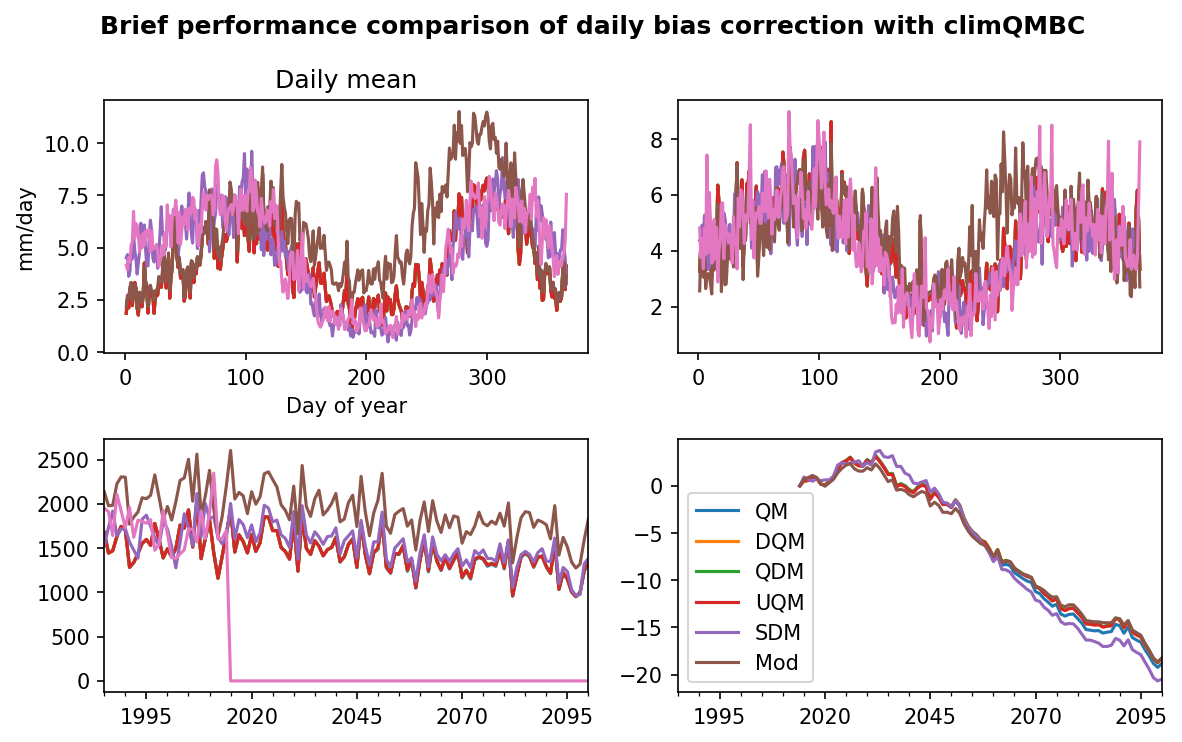

In [79]:
plt.figure(figsize=(8,5), dpi=150)
plt.suptitle('Brief performance comparison of daily bias correction with climQMBC', fontweight='bold')

ax=plt.subplot(2,2,1)
ax.set_title('Daily mean')
ax.set_xlabel('Day of year')
ax.set_ylabel('mm/day')
df_h.groupby(by=df_h.index.dayofyear).mean().plot(ax=ax, legend=False)

ax=plt.subplot(2,2,2)
df_h.groupby(by=df_h.index.dayofyear).std().plot(ax=ax, legend=False)

ax=plt.subplot(2,2,3)
df.resample('Y').sum().plot(ax=ax, legend=False)

ax=plt.subplot(2,2,4)
df_trend = 100*(df.resample('Y').sum()/df_h.resample('Y').sum().mean() -1)
df_trend.iloc[:,:-1].rolling(30).mean().plot(ax=ax)

plt.tight_layout()
plt.show()